<a href="https://colab.research.google.com/github/sanchitjain04/EIP/blob/master/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D, SeparableConv2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

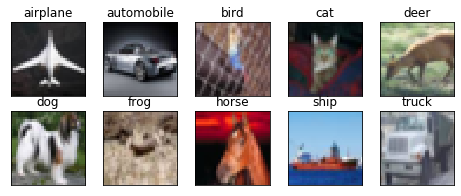

In [220]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [0]:
model.summary()



Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_3 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 96)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':


Epoch 1/50
390/390 [==============================] - 9s 23ms/step - loss: 1.8641 - acc: 0.2827 - val_loss: 1.5104 - val_acc: 0.4506
Epoch 2/50
390/390 [==============================] - 8s 20ms/step - loss: 1.4286 - acc: 0.4774 - val_loss: 1.2146 - val_acc: 0.5571
Epoch 3/50
390/390 [==============================] - 8s 20ms/step - loss: 1.2021 - acc: 0.5720 - val_loss: 1.0244 - val_acc: 0.6402
Epoch 4/50
390/390 [==============================] - 8s 20ms/step - loss: 1.0233 - acc: 0.6420 - val_loss: 0.9022 - val_acc: 0.6914
Epoch 5/50
390/390 [==============================] - 8s 20ms/step - loss: 0.9252 - acc: 0.6810 - val_loss: 0.8688 - val_acc: 0.7064
Epoch 6/50
390/390 [==============================] - 8s 20ms/step - loss: 0.8405 - acc: 0.7122 - val_loss: 0.7555 - val_acc: 0.7360
Epoch 7/50
390/390 [==============================] - 8s 20ms/step - loss: 0.7747 - acc: 0.7360 - val_loss: 0.7347 - val_acc: 0.7543
Epoch 8/50
390/390 [==============================] - 8s 20ms/step - 

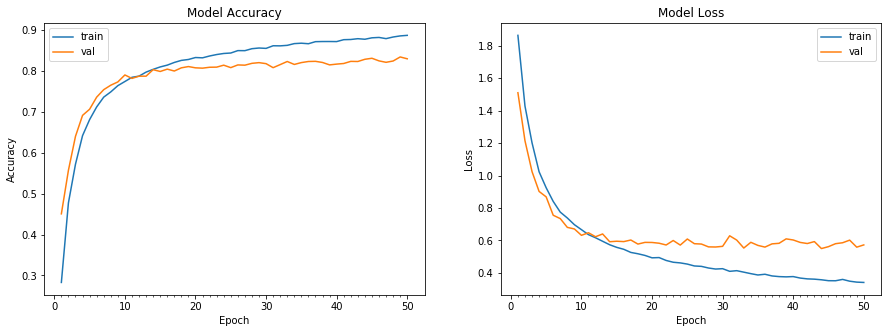

Accuracy on test data is: 82.98


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [0]:
#  Using Depthwise Seperable Conv2D

model = Sequential()
model.add(SeparableConv2D(48, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3))) # N_out=23, RF=1

model.add(SeparableConv2D(48, kernel_size=(3, 3), activation='relu')) # N_out=23, RF=5
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(SeparableConv2D(96, kernel_size=(3, 3), activation='relu')) # N_out=42, RF=7
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(SeparableConv2D(96, kernel_size=(3, 3), activation='relu')) # N_out=42, RF=9
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(SeparableConv2D(96, kernel_size=(3, 3), activation='relu')) # N_out=42, RF=11
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(MaxPooling2D(pool_size=(2, 2))) # N_out=2, RF=13

model.add(SeparableConv2D(96, kernel_size=(3, 3), activation='relu')) # N_out=42, RF=15
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(SeparableConv2D(128, kernel_size=(3, 3), activation='relu')) # N_out=64, RF=17
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(SeparableConv2D(128, kernel_size=(3, 3), activation='relu')) # N_out=64, RF=19
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(SeparableConv2D(128, kernel_size=(3, 3), activation='relu')) # N_out=64, RF=19
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(SeparableConv2D(10, kernel_size=(3, 3), activation='relu')) # N_out=64, RF=19
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Activation('softmax'))

In [225]:
model.summary()

Model: "sequential_64"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_529 (Separa (None, 30, 30, 48)        219       
_________________________________________________________________
separable_conv2d_530 (Separa (None, 28, 28, 48)        2784      
_________________________________________________________________
batch_normalization_428 (Bat (None, 28, 28, 48)        192       
_________________________________________________________________
dropout_403 (Dropout)        (None, 28, 28, 48)        0         
_________________________________________________________________
separable_conv2d_531 (Separa (None, 26, 26, 96)        5136      
_________________________________________________________________
batch_normalization_429 (Bat (None, 26, 26, 96)        384       
_________________________________________________________________
dropout_404 (Dropout)        (None, 26, 26, 96)      

In [0]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':


Epoch 1/50
390/390 [==============================] - 67s 171ms/step - loss: 1.8189 - acc: 0.3552 - val_loss: 1.6985 - val_acc: 0.4139
Epoch 2/50
390/390 [==============================] - 37s 94ms/step - loss: 1.4154 - acc: 0.5090 - val_loss: 1.6981 - val_acc: 0.4169
Epoch 3/50
390/390 [==============================] - 37s 94ms/step - loss: 1.2582 - acc: 0.5665 - val_loss: 1.2454 - val_acc: 0.5736
Epoch 4/50
390/390 [==============================] - 37s 95ms/step - loss: 1.1506 - acc: 0.6028 - val_loss: 1.1090 - val_acc: 0.6158
Epoch 5/50
390/390 [==============================] - 36s 94ms/step - loss: 1.0651 - acc: 0.6324 - val_loss: 1.0806 - val_acc: 0.6314
Epoch 6/50
390/390 [==============================] - 36s 93ms/step - loss: 1.0060 - acc: 0.6522 - val_loss: 0.9765 - val_acc: 0.6702
Epoch 7/50
390/390 [==============================] - 36s 93ms/step - loss: 0.9462 - acc: 0.6739 - val_loss: 0.8725 - val_acc: 0.7059
Epoch 8/50
390/390 [==============================] - 36s 93m

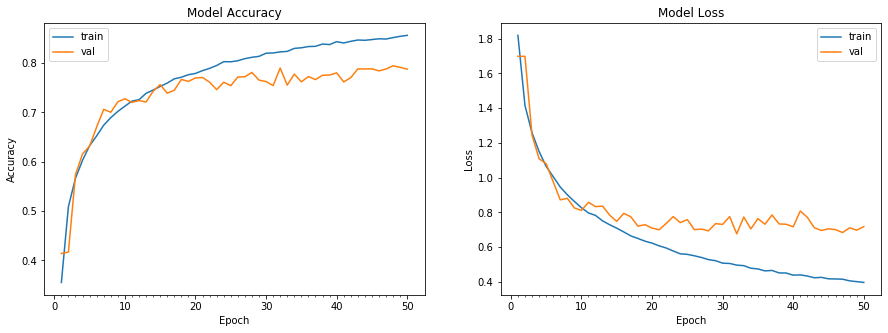

Accuracy on test data is: 78.75


In [228]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))